The following script consists of a Python version of Andrew Ng's Stanford Course 'Machine Learning' taught on the Coursera Platform

**Note: All exercise data and structure are credited to Stanford University** 

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

In [135]:
# Import numpy libraries to deal with matrixes and vectors
import numpy as np
# Import pandas do read data files
import pandas as pd
# Import matplotlib to plot data
import matplotlib.pyplot as plt

#Matplotlib notebook property
%matplotlib inline

First exercise consists of developing a multiple variable linear regression. 
<br>
<br>
When we deal with multiple variables it is normally necessary (in most algorithms that rely on distances) to normalize features between a specific range. In gradient descent, normalizing features enables the algorithm to converge much faster.

# Exercise 1 - Normalizing Features

The data we are going to analyze is part of a real estate company. In this example, we are trying to predict the value of the house based on two variables:
- The size of the house (in meters squares);
- The number of bedrooms;
<br>
<br>
Can we develop an algorithm capable of, given the size and bedroom number, predict the value of the estate with accuracy?

In [136]:
# Read Text File and create X and y variables 
ex2_file = pd.read_csv('ex1data2.txt', header=None) 

X = np.array(ex2_file.iloc[:,0:2])

y = np.array(ex2_file.iloc[:,2])

print('# of training examples: {} \n'.format(len(X)))

print('Printing some examples of training table: \n')

for i in np.arange(1,10):
    print('X = {} , y = {}'.format(X[i], y[i]))

# of training examples: 47 

Printing some examples of training table: 

X = [1600    3] , y = 329900
X = [2400    3] , y = 369000
X = [1416    2] , y = 232000
X = [3000    4] , y = 539900
X = [1985    4] , y = 299900
X = [1534    3] , y = 314900
X = [1427    3] , y = 198999
X = [1380    3] , y = 212000
X = [1494    3] , y = 242500


In [141]:
# Normalize Features - Applying standardization of the variables

def featureNormalize(
    features: np.array
) -> [np.array, np.array, np.array]:
    """
    
    Returns the standardized version of matrix "features" 
    The formula applied is z = ((xi-mean)/standard deviation)
    where i is each observation for nth column
    
    Args:
        features (np.array): The original nth column matrix to normalize.
        
    Returns:
        X_norm (np.array): Matrix of normalized values.
        mean (np.array): Mean of each nth column.
        sigma (np.array): Standard deviation of each nth column.
        
    """
    
    mean = features.mean(axis=0)
    # To get the same result as Octave std function you have to set degrees of freedom to 1 with the ddof parameter
    sigma = features.std(axis=0,ddof=1)
    X_norm = ((features-mean)/sigma)
    return X_norm, mean, sigma

We are going to apply a standardization of the variables, based on the following formula for each variable:

<img src='assets/Standardization.png'>

**The standardization of variable z is done by applying the formula above, where:**
<br>
- Xi is equal to the ith observation
<br>
- μ is equal to the mean of the variable 
<br>
- σ is equal to the standard deviation of the variable

In [138]:
# Retrieve normalized matrix, mu and sigma
X, mu, sigma = featureNormalize(X)

In [139]:
# Add column of ones to the array 
ones_vector = np.ones((len(X),1))
# Creating X_ext object to avoid overwriting original X object
X_ext = np.hstack((ones_vector,X))

Just like we have done with a single variable, we are going to do gradient descent for multiple variables.
<br>
The difference for in this example is that we are going to have a new Θ to optimize (Θ2) - rather than just Θ0 and Θ1.

We are going to do a vectorized approach as, for larger values of m (observations) or n (number of Θ's to optimize), a vectorized approach is always preferable than a loop approach as it is computationally cheaper.

Checking the formulas: 

<img src='assets/Multivariate Cost Function.JPG'>

# Exercise 2 - Gradient Descent

In [142]:
# Compute gradient for multiple features 
# Initialize theta, learning rates and number of iterations
theta = np.zeros((3,1))
alpha = 0.1;
num_iters = 400;

In [143]:
# Define multivariable Cost Function
def computeCostMulti (
    X: np.array, 
    y:np.array , 
    theta: np.array
) -> int:
    """
    
    Returns the cost function (average squared error) 
    using matrix X*Theta and it's output Y
    
    Args:
        X (np.array): The values of each observation.
        y (np.array): The values to predict.
        theta (np.array): The weight to give to each variable that 
        will be multiplied by X to represent the hypothesis.
        
    Returns:
        J (int): The sum of the errors - overall cost function for 
        the presented thetas.
        
    """ 
    m = len(y) 
    # Compute hypothesis
    hypothesis = np.dot(X,theta)
    # Compute cost function, using average squared error
    J = (sum((hypothesis-y.reshape(len(y),1))**2))/(2*m)
    return J

# Define multivariate Gradient Descent
def gradientDescentMulti(
    X: np.array,
    y: np.array,
    theta: np.array,
    alpha: float,
    num_iters: int
) -> [np.array, np.array]:
    """
    
    Computes new theta based on iterations 
    and history of cost functions for each 
    iteration of gradient descent.
    
    Args:
        X (np.array): The values of each observation.
        y (np.array): The values to predict.
        theta (np.array): The initial weight to give to each variable that 
        will be multiplied by X to represent the hypothesis.
        alpha(float): The learning rate of gradient descent.
        num_iters(int): The number of iterations.
        
    Returns:
        Theta (np.array): The array of optimized thetas returned by 
        the final iteration of gradiend descent.
        J_history (np.array): The history of the error function (J) 
        during every iteration of gradient descent.
        
    """ 
    
    m = len(y)
    # Create vector where we will input each result of the cost function
    J_history = np.zeros((num_iters, 1))
    # loop through each iteration
    for i in np.arange(0,num_iters):
        # Compute hypothesis
        hypothesis = np.dot(X,theta)
        # Update theta by computing gradient
        theta -= alpha * (1/m) * np.dot(np.transpose(X),(hypothesis-y.reshape(len(y),1)))
        # Assign cost function value with new theta to the J_history ith position
        J_history[i] = computeCostMulti(X,y,theta)
    return theta, J_history 

In [116]:
# Return value of theta on the last iteration and an array with the history of the cost function
theta, J_history = gradientDescentMulti(X_ext,y,theta,alpha,num_iters)

By plotting the convergence of the Cost Function we can notice several things:
<br>
    -  The cost function stabilized after ~25 iterations;
    -  The cost function changes by a higher magnitude on the first iterations. After the 25th iteration, the change in the Θ parameters only bring decimal changes to the cost function J;
<br>
We will use the code below to plot the J_history object - Cost Function at each iteration:

Text(0, 0.5, 'Cost Function (J)')

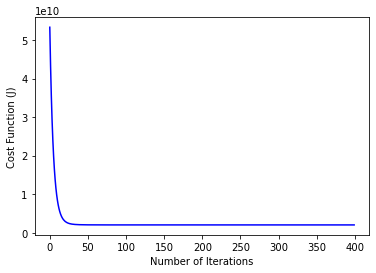

In [117]:
# Plot the convergence graph - notice how after 25 iterations the curve starts to become flat
plt.plot(np.arange(0,num_iters),J_history,c='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function (J)')

**You can make the cost function coverge slower by using a lower learning rate.**

**What were the optimal thetas created?**

In [119]:
print('Theta computed from gradient descent \n {}'.format(theta))

Theta computed from gradient descent 
 [[340412.65957447]
 [110631.04895815]
 [ -6649.47295013]]


We can now use the new thetas to predict new examples of data coming in. For example, imagine we have a new house that is 1650 square feet and has three bedrooms. Given this, what is the predicted price for this house?  

In [59]:
test_example = np.array((1, 1650, 3)).astype('float64')
test_example[1:] = (test_example[1:].reshape(1,2)-mu.reshape(1,2))/sigma.reshape(1,2)
price = np.dot(test_example, theta)

In [121]:
print ('Predicted price for a 1650 sq-ft, 3 br house (using gradient descent) is : \n {} $'.format(int(price)))

Predicted price for a 1650 sq-ft, 3 br house (using gradient descent) is : 
 293081 $


For this linear problem we have used gradient descent to minimize the squared error function and thus optimize our thetas.
<br>
<br> 
But, there is another method that can be used when finding the minimum error for multiple linear regression (also, this method ends up being computationally cheaper as it solves the problem by using vectorization, avoiding the gradient descent iteration).
This method is called Normal Equations or OLS - Ordinary least squares.
<br>
<br>
**The formula to calculate the optimized array of thetas is as follows:**

<img src='assets/NormalEquations.JPG'>

# Exercise 3 - Normal Equations

In [145]:
# Load the data Again
ex2_file = pd.read_csv('ex1data2.txt', header=None) 
X = np.array(ex2_file.iloc[:,0:2])
y = np.array(ex2_file.iloc[:,2])

m = y.size

# Add column of ones to the array 
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [150]:
def normalEqn(
    X: np.array,
    y: np.array
) -> np.array:
    """
    
    Computes the optimal thetas using the OLS
    method.
    
    Args:
        X (np.array): The values of each observation.
        y (np.array): The values to predict.
        
    Returns:
        Theta (np.array): The array of optimized thetas returned by 
        the ordinary least square method (Normal equations).
        
    """ 
    # Placeholder for thetas
    theta = np.zeros(X.shape[1])
    # OLS method calculation
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [147]:
theta = normalEqn(X,y)

In [148]:
print('Theta computed from the Normal Equation Method \n {}'.format(theta))

Theta computed from the Normal Equation Method 
 [340412.65957447 110631.05027885  -6649.47427082]


Notice how the thetas calculated by OLS is approximately the same as the ones returned by gradient descent. 
<br>
And we did it with fewer lines of code! 
<br>
**The caveat of this method is that it only works for linear equations - a limitation in terms of most of the functions that we want to learn - not many problems in the real world behave in a linear way.**

Do we have the same prediction for the new house? 

In [151]:
test_example = np.array((1, 1650, 3)).astype('float64')
test_example[1:] = (test_example[1:].reshape(1,2)-mu.reshape(1,2))/sigma.reshape(1,2)
price = np.dot(test_example, theta)

print ('Predicted price for a 1650 sq-ft, 3 br house (using normal equation) is : \n {} $'.format(int(price)))

Predicted price for a 1650 sq-ft, 3 br house (using normal equation) is : 
 293081 $
